In [1]:
import os
import copy
from matplotlib import pyplot as plt
from cascade.cascade import Cascade
import numpy as np
import cmocean
from cascade.tools import outwash_plotters as out_plt
from cascade.tools import plotters as cascade_plt

# B3D Only: Outwash module set to false

In [2]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_b3d_only = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-left-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=False,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.45,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_10yrs_early.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=100,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=3.65E-3,
    cx=0.675
)

In [3]:
for time_step in range(cascade_b3d_only._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_b3d_only.update()
    if cascade_b3d_only.b3d_break:
        break

 Time Step:  99

Text(0, 0.5, 'shoreline position')

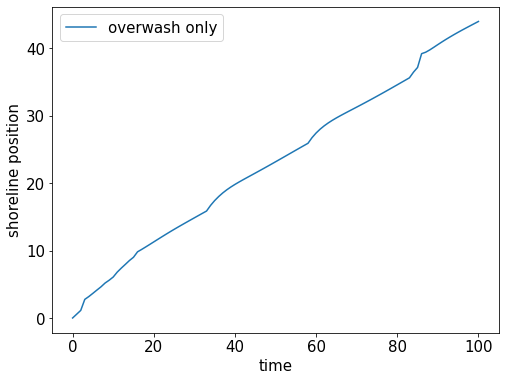

In [4]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

m_xsTS = np.subtract(cascade_b3d_only.barrier3d[0].x_s_TS, cascade_b3d_only.barrier3d[0].x_s_TS[0])
m_xsTS = np.multiply(m_xsTS,10)

plt.plot(m_xsTS, label="overwash only")
plt.legend()
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
# plt.savefig(newpath + "shoreline_position", facecolor='w')

# 100% to shoreface

In [5]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash100 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-left-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.45,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_10yrs_early.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=100,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=3.65E-3,
    cx=0.675
)

In [6]:
for time_step in range(cascade_outwash100._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash100.update()
    if cascade_outwash100.b3d_break:
        break

 Time Step:  0Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step: 

Outwasher Time Step:  319
Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Ti

Outwasher Time Step:  636
Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Time Step:  673
Outwasher Ti

Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Time Step:  990
Outwasher Ti

Outwasher Time Step:  1260
Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
Outwasher Time Step:  1295
Outwasher Time Step:  1296
O

Outwasher Time Step:  169
Outwasher Time Step:  170
Outwasher Time Step:  171
Outwasher Time Step:  172
Outwasher Time Step:  173
Outwasher Time Step:  174
Outwasher Time Step:  175
Outwasher Time Step:  176
Outwasher Time Step:  177
Outwasher Time Step:  178
Outwasher Time Step:  179
Outwasher Time Step:  180
Outwasher Time Step:  181
Outwasher Time Step:  182
Outwasher Time Step:  183
Outwasher Time Step:  184
Outwasher Time Step:  185
Outwasher Time Step:  186
Outwasher Time Step:  187
Outwasher Time Step:  188
Outwasher Time Step:  189
Outwasher Time Step:  190
Outwasher Time Step:  191
Outwasher Time Step:  192
Outwasher Time Step:  193
Outwasher Time Step:  194
Outwasher Time Step:  195
Outwasher Time Step:  196
Outwasher Time Step:  197
Outwasher Time Step:  198
Outwasher Time Step:  199
Outwasher Time Step:  200
Outwasher Time Step:  201
Outwasher Time Step:  202
Outwasher Time Step:  203
Outwasher Time Step:  204
Outwasher Time Step:  205
Outwasher Time Step:  206
Outwasher Ti

Outwasher Time Step:  485
Outwasher Time Step:  486
Outwasher Time Step:  487
Outwasher Time Step:  488
Outwasher Time Step:  489
Outwasher Time Step:  490
Outwasher Time Step:  491
Outwasher Time Step:  492
Outwasher Time Step:  493
Outwasher Time Step:  494
Outwasher Time Step:  495
Outwasher Time Step:  496
Outwasher Time Step:  497
Outwasher Time Step:  498
Outwasher Time Step:  499
Outwasher Time Step:  500
Outwasher Time Step:  501
Outwasher Time Step:  502
Outwasher Time Step:  503
Outwasher Time Step:  504
Outwasher Time Step:  505
Outwasher Time Step:  506
Outwasher Time Step:  507
Outwasher Time Step:  508
Outwasher Time Step:  509
Outwasher Time Step:  510
Outwasher Time Step:  511
Outwasher Time Step:  512
Outwasher Time Step:  513
Outwasher Time Step:  514
Outwasher Time Step:  515
Outwasher Time Step:  516
Outwasher Time Step:  517
Outwasher Time Step:  518
Outwasher Time Step:  519
Outwasher Time Step:  520
Outwasher Time Step:  521
Outwasher Time Step:  522
Outwasher Ti

Outwasher Time Step:  801
Outwasher Time Step:  802
Outwasher Time Step:  803
Outwasher Time Step:  804
Outwasher Time Step:  805
Outwasher Time Step:  806
Outwasher Time Step:  807
Outwasher Time Step:  808
Outwasher Time Step:  809
Outwasher Time Step:  810
Outwasher Time Step:  811
Outwasher Time Step:  812
Outwasher Time Step:  813
Outwasher Time Step:  814
Outwasher Time Step:  815
Outwasher Time Step:  816
Outwasher Time Step:  817
Outwasher Time Step:  818
Outwasher Time Step:  819
Outwasher Time Step:  820
Outwasher Time Step:  821
Outwasher Time Step:  822
Outwasher Time Step:  823
Outwasher Time Step:  824
Outwasher Time Step:  825
Outwasher Time Step:  826
Outwasher Time Step:  827
Outwasher Time Step:  828
Outwasher Time Step:  829
Outwasher Time Step:  830
Outwasher Time Step:  831
Outwasher Time Step:  832
Outwasher Time Step:  833
Outwasher Time Step:  834
Outwasher Time Step:  835
Outwasher Time Step:  836
Outwasher Time Step:  837
Outwasher Time Step:  838
Outwasher Ti

Outwasher Time Step:  1112
Outwasher Time Step:  1113
Outwasher Time Step:  1114
Outwasher Time Step:  1115
Outwasher Time Step:  1116
Outwasher Time Step:  1117
Outwasher Time Step:  1118
Outwasher Time Step:  1119
Outwasher Time Step:  1120
Outwasher Time Step:  1121
Outwasher Time Step:  1122
Outwasher Time Step:  1123
Outwasher Time Step:  1124
Outwasher Time Step:  1125
Outwasher Time Step:  1126
Outwasher Time Step:  1127
Outwasher Time Step:  1128
Outwasher Time Step:  1129
Outwasher Time Step:  1130
Outwasher Time Step:  1131
Outwasher Time Step:  1132
Outwasher Time Step:  1133
Outwasher Time Step:  1134
Outwasher Time Step:  1135
Outwasher Time Step:  1136
Outwasher Time Step:  1137
Outwasher Time Step:  1138
Outwasher Time Step:  1139
Outwasher Time Step:  1140
Outwasher Time Step:  1141
Outwasher Time Step:  1142
Outwasher Time Step:  1143
Outwasher Time Step:  1144
Outwasher Time Step:  1145
Outwasher Time Step:  1146
Outwasher Time Step:  1147
Outwasher Time Step:  1148
O

Outwasher Time Step:  1416
Outwasher Time Step:  1417
Outwasher Time Step:  1418
Outwasher Time Step:  1419
Outwasher Time Step:  1420
Outwasher Time Step:  1421
Outwasher Time Step:  1422
Outwasher Time Step:  1423
Outwasher Time Step:  1424
Outwasher Time Step:  1425
Outwasher Time Step:  1426
Outwasher Time Step:  1427
Outwasher Time Step:  1428
Outwasher Time Step:  1429
Outwasher Time Step:  1430
Outwasher Time Step:  1431
Outwasher Time Step:  1432
Outwasher Time Step:  1433
Outwasher Time Step:  1434
Outwasher Time Step:  1435
Outwasher Time Step:  1436
Outwasher Time Step:  1437
Outwasher Time Step:  1438
Outwasher Time Step:  1439
Outwasher Time Step:  1440
Outwasher Time Step:  1441
Outwasher Time Step:  1442
Outwasher Time Step:  1443
Outwasher Time Step:  1444
Outwasher Time Step:  1445
Outwasher Time Step:  1446
Outwasher Time Step:  1447
Outwasher Time Step:  1448
Outwasher Time Step:  1449
Outwasher Time Step:  1450
Outwasher Time Step:  1451
 Time Step:  13

C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1533: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1535: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


 Time Step:  20Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  319
Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Ti

Outwasher Time Step:  635
Outwasher Time Step:  636
Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Ti

Outwasher Time Step:  951
Outwasher Time Step:  952
Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Ti

Outwasher Time Step:  1258
Outwasher Time Step:  1259
Outwasher Time Step:  1260
Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
O

c:\users\lexi\pycharmprojects\cascade\venv\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\users\lexi\pycharmprojects\cascade\venv\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'shoreline position')

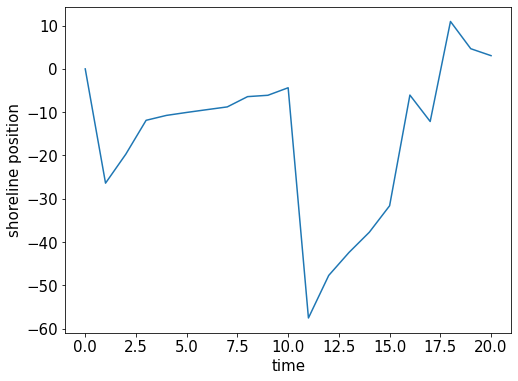

In [7]:
m_xsTS_100 = np.subtract(cascade_outwash100.barrier3d[0].x_s_TS, cascade_outwash100.barrier3d[0].x_s_TS[0])
m_xsTS_100 = np.multiply(m_xsTS_100,10)

plt.plot(m_xsTS_100)
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")


In [8]:
cascade_outwash100.barrier3d[0].BermEl

0.10999999999999999

Text(0.5, 1.0, 'Outwash to Shoreface')

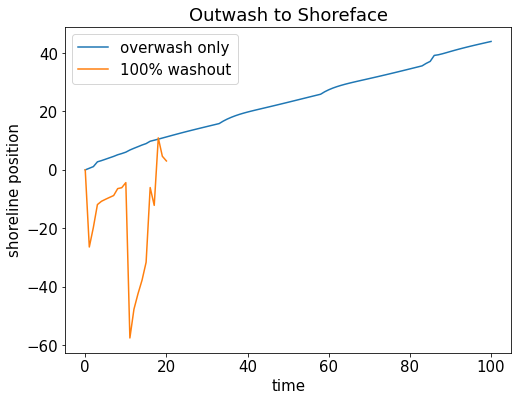

In [9]:
plt.plot(m_xsTS, label="overwash only")
plt.plot(m_xsTS_100, label="100% washout")
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=580, colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
# plt.ylim([500, 580])
plt.legend()
plt.title("Outwash to Shoreface")



# 50% Outwash to shoreface

In [10]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash50 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-left-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.45,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_10yrs_early.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=50,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=3.65E-3,
    cx=0.675
)

In [11]:
for time_step in range(cascade_outwash50._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash50.update()
    if cascade_outwash50.b3d_break:
        break

 Time Step:  0Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step: 

Outwasher Time Step:  319
Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Ti

Outwasher Time Step:  635
Outwasher Time Step:  636
Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Ti

Outwasher Time Step:  952
Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Ti

Outwasher Time Step:  1258
Outwasher Time Step:  1259
Outwasher Time Step:  1260
Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
O

Outwasher Time Step:  170
Outwasher Time Step:  171
Outwasher Time Step:  172
Outwasher Time Step:  173
Outwasher Time Step:  174
Outwasher Time Step:  175
Outwasher Time Step:  176
Outwasher Time Step:  177
Outwasher Time Step:  178
Outwasher Time Step:  179
Outwasher Time Step:  180
Outwasher Time Step:  181
Outwasher Time Step:  182
Outwasher Time Step:  183
Outwasher Time Step:  184
Outwasher Time Step:  185
Outwasher Time Step:  186
Outwasher Time Step:  187
Outwasher Time Step:  188
Outwasher Time Step:  189
Outwasher Time Step:  190
Outwasher Time Step:  191
Outwasher Time Step:  192
Outwasher Time Step:  193
Outwasher Time Step:  194
Outwasher Time Step:  195
Outwasher Time Step:  196
Outwasher Time Step:  197
Outwasher Time Step:  198
Outwasher Time Step:  199
Outwasher Time Step:  200
Outwasher Time Step:  201
Outwasher Time Step:  202
Outwasher Time Step:  203
Outwasher Time Step:  204
Outwasher Time Step:  205
Outwasher Time Step:  206
Outwasher Time Step:  207
Outwasher Ti

Outwasher Time Step:  1192
Outwasher Time Step:  1193
Outwasher Time Step:  1194
Outwasher Time Step:  1195
Outwasher Time Step:  1196
Outwasher Time Step:  1197
Outwasher Time Step:  1198
Outwasher Time Step:  1199
Outwasher Time Step:  1200
Outwasher Time Step:  1201
Outwasher Time Step:  1202
Outwasher Time Step:  1203
Outwasher Time Step:  1204
Outwasher Time Step:  1205
Outwasher Time Step:  1206
Outwasher Time Step:  1207
Outwasher Time Step:  1208
Outwasher Time Step:  1209
Outwasher Time Step:  1210
Outwasher Time Step:  1211
Outwasher Time Step:  1212
Outwasher Time Step:  1213
Outwasher Time Step:  1214
Outwasher Time Step:  1215
Outwasher Time Step:  1216
Outwasher Time Step:  1217
Outwasher Time Step:  1218
Outwasher Time Step:  1219
Outwasher Time Step:  1220
Outwasher Time Step:  1221
Outwasher Time Step:  1222
Outwasher Time Step:  1223
Outwasher Time Step:  1224
Outwasher Time Step:  1225
Outwasher Time Step:  1226
Outwasher Time Step:  1227
Outwasher Time Step:  1228
O

Outwasher Time Step:  205
Outwasher Time Step:  206
Outwasher Time Step:  207
Outwasher Time Step:  208
Outwasher Time Step:  209
Outwasher Time Step:  210
Outwasher Time Step:  211
Outwasher Time Step:  212
Outwasher Time Step:  213
Outwasher Time Step:  214
Outwasher Time Step:  215
Outwasher Time Step:  216
Outwasher Time Step:  217
Outwasher Time Step:  218
Outwasher Time Step:  219
Outwasher Time Step:  220
Outwasher Time Step:  221
Outwasher Time Step:  222
Outwasher Time Step:  223
Outwasher Time Step:  224
Outwasher Time Step:  225
Outwasher Time Step:  226
Outwasher Time Step:  227
Outwasher Time Step:  228
Outwasher Time Step:  229
Outwasher Time Step:  230
Outwasher Time Step:  231
Outwasher Time Step:  232
Outwasher Time Step:  233
Outwasher Time Step:  234
Outwasher Time Step:  235
Outwasher Time Step:  236
Outwasher Time Step:  237
Outwasher Time Step:  238
Outwasher Time Step:  239
Outwasher Time Step:  240
Outwasher Time Step:  241
Outwasher Time Step:  242
Outwasher Ti

Outwasher Time Step:  537
Outwasher Time Step:  538
Outwasher Time Step:  539
Outwasher Time Step:  540
Outwasher Time Step:  541
Outwasher Time Step:  542
Outwasher Time Step:  543
Outwasher Time Step:  544
Outwasher Time Step:  545
Outwasher Time Step:  546
Outwasher Time Step:  547
Outwasher Time Step:  548
Outwasher Time Step:  549
Outwasher Time Step:  550
Outwasher Time Step:  551
Outwasher Time Step:  552
Outwasher Time Step:  553
Outwasher Time Step:  554
Outwasher Time Step:  555
Outwasher Time Step:  556
Outwasher Time Step:  557
Outwasher Time Step:  558
Outwasher Time Step:  559
Outwasher Time Step:  560
Outwasher Time Step:  561
Outwasher Time Step:  562
Outwasher Time Step:  563
Outwasher Time Step:  564
Outwasher Time Step:  565
Outwasher Time Step:  566
Outwasher Time Step:  567
Outwasher Time Step:  568
Outwasher Time Step:  569
Outwasher Time Step:  570
Outwasher Time Step:  571
Outwasher Time Step:  572
Outwasher Time Step:  573
Outwasher Time Step:  574
Outwasher Ti

Outwasher Time Step:  1350
Outwasher Time Step:  1351
Outwasher Time Step:  1352
Outwasher Time Step:  1353
Outwasher Time Step:  1354
Outwasher Time Step:  1355
Outwasher Time Step:  1356
Outwasher Time Step:  1357
Outwasher Time Step:  1358
Outwasher Time Step:  1359
Outwasher Time Step:  1360
Outwasher Time Step:  1361
Outwasher Time Step:  1362
Outwasher Time Step:  1363
Outwasher Time Step:  1364
Outwasher Time Step:  1365
Outwasher Time Step:  1366
Outwasher Time Step:  1367
Outwasher Time Step:  1368
Outwasher Time Step:  1369
Outwasher Time Step:  1370
Outwasher Time Step:  1371
Outwasher Time Step:  1372
Outwasher Time Step:  1373
Outwasher Time Step:  1374
Outwasher Time Step:  1375
Outwasher Time Step:  1376
Outwasher Time Step:  1377
Outwasher Time Step:  1378
Outwasher Time Step:  1379
Outwasher Time Step:  1380
Outwasher Time Step:  1381
Outwasher Time Step:  1382
Outwasher Time Step:  1383
Outwasher Time Step:  1384
Outwasher Time Step:  1385
Outwasher Time Step:  1386
O

Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Time Step:  990
Outwasher Ti

 Time Step:  40Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  1088
Outwasher Time Step:  1089
Outwasher Time Step:  1090
Outwasher Time Step:  1091
Outwasher Time Step:  1092
Outwasher Time Step:  1093
Outwasher Time Step:  1094
Outwasher Time Step:  1095
Outwasher Time Step:  1096
Outwasher Time Step:  1097
Outwasher Time Step:  1098
Outwasher Time Step:  1099
Outwasher Time Step:  1100
Outwasher Time Step:  1101
Outwasher Time Step:  1102
Outwasher Time Step:  1103
Outwasher Time Step:  1104
Outwasher Time Step:  1105
Outwasher Time Step:  1106
Outwasher Time Step:  1107
Outwasher Time Step:  1108
Outwasher Time Step:  1109
Outwasher Time Step:  1110
Outwasher Time Step:  1111
Outwasher Time Step:  1112
Outwasher Time Step:  1113
Outwasher Time Step:  1114
Outwasher Time Step:  1115
Outwasher Time Step:  1116
Outwasher Time Step:  1117
Outwasher Time Step:  1118
Outwasher Time Step:  1119
Outwasher Time Step:  1120
Outwasher Time Step:  1121
Outwasher Time Step:  1122
Outwasher Time Step:  1123
Outwasher Time Step:  1124
O

 Time Step:  50Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  948
Outwasher Time Step:  949
Outwasher Time Step:  950
Outwasher Time Step:  951
Outwasher Time Step:  952
Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Ti

 Time Step:  60Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Time Step:  357
Outwasher Ti

Outwasher Time Step:  636
Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Time Step:  673
Outwasher Ti

Outwasher Time Step:  952
Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Ti

Outwasher Time Step:  1258
Outwasher Time Step:  1259
Outwasher Time Step:  1260
Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
O

Outwasher Time Step:  735
Outwasher Time Step:  736
Outwasher Time Step:  737
Outwasher Time Step:  738
Outwasher Time Step:  739
Outwasher Time Step:  740
Outwasher Time Step:  741
Outwasher Time Step:  742
Outwasher Time Step:  743
Outwasher Time Step:  744
Outwasher Time Step:  745
Outwasher Time Step:  746
Outwasher Time Step:  747
Outwasher Time Step:  748
Outwasher Time Step:  749
Outwasher Time Step:  750
Outwasher Time Step:  751
Outwasher Time Step:  752
Outwasher Time Step:  753
Outwasher Time Step:  754
Outwasher Time Step:  755
Outwasher Time Step:  756
Outwasher Time Step:  757
Outwasher Time Step:  758
Outwasher Time Step:  759
Outwasher Time Step:  760
Outwasher Time Step:  761
Outwasher Time Step:  762
Outwasher Time Step:  763
Outwasher Time Step:  764
Outwasher Time Step:  765
Outwasher Time Step:  766
Outwasher Time Step:  767
Outwasher Time Step:  768
Outwasher Time Step:  769
Outwasher Time Step:  770
Outwasher Time Step:  771
Outwasher Time Step:  772
Outwasher Ti

Outwasher Time Step:  1394
Outwasher Time Step:  1395
Outwasher Time Step:  1396
Outwasher Time Step:  1397
Outwasher Time Step:  1398
Outwasher Time Step:  1399
Outwasher Time Step:  1400
Outwasher Time Step:  1401
Outwasher Time Step:  1402
Outwasher Time Step:  1403
Outwasher Time Step:  1404
Outwasher Time Step:  1405
Outwasher Time Step:  1406
Outwasher Time Step:  1407
Outwasher Time Step:  1408
Outwasher Time Step:  1409
Outwasher Time Step:  1410
Outwasher Time Step:  1411
Outwasher Time Step:  1412
Outwasher Time Step:  1413
Outwasher Time Step:  1414
Outwasher Time Step:  1415
Outwasher Time Step:  1416
Outwasher Time Step:  1417
Outwasher Time Step:  1418
Outwasher Time Step:  1419
Outwasher Time Step:  1420
Outwasher Time Step:  1421
Outwasher Time Step:  1422
Outwasher Time Step:  1423
Outwasher Time Step:  1424
Outwasher Time Step:  1425
Outwasher Time Step:  1426
Outwasher Time Step:  1427
Outwasher Time Step:  1428
Outwasher Time Step:  1429
Outwasher Time Step:  1430
O

Outwasher Time Step:  259
Outwasher Time Step:  260
Outwasher Time Step:  261
Outwasher Time Step:  262
Outwasher Time Step:  263
Outwasher Time Step:  264
Outwasher Time Step:  265
Outwasher Time Step:  266
Outwasher Time Step:  267
Outwasher Time Step:  268
Outwasher Time Step:  269
Outwasher Time Step:  270
Outwasher Time Step:  271
Outwasher Time Step:  272
Outwasher Time Step:  273
Outwasher Time Step:  274
Outwasher Time Step:  275
Outwasher Time Step:  276
Outwasher Time Step:  277
Outwasher Time Step:  278
Outwasher Time Step:  279
Outwasher Time Step:  280
Outwasher Time Step:  281
Outwasher Time Step:  282
Outwasher Time Step:  283
Outwasher Time Step:  284
Outwasher Time Step:  285
Outwasher Time Step:  286
Outwasher Time Step:  287
Outwasher Time Step:  288
Outwasher Time Step:  289
Outwasher Time Step:  290
Outwasher Time Step:  291
Outwasher Time Step:  292
Outwasher Time Step:  293
Outwasher Time Step:  294
Outwasher Time Step:  295
Outwasher Time Step:  296
Outwasher Ti

Outwasher Time Step:  575
Outwasher Time Step:  576
Outwasher Time Step:  577
Outwasher Time Step:  578
Outwasher Time Step:  579
Outwasher Time Step:  580
Outwasher Time Step:  581
Outwasher Time Step:  582
Outwasher Time Step:  583
Outwasher Time Step:  584
Outwasher Time Step:  585
Outwasher Time Step:  586
Outwasher Time Step:  587
Outwasher Time Step:  588
Outwasher Time Step:  589
Outwasher Time Step:  590
Outwasher Time Step:  591
Outwasher Time Step:  592
Outwasher Time Step:  593
Outwasher Time Step:  594
Outwasher Time Step:  595
Outwasher Time Step:  596
Outwasher Time Step:  597
Outwasher Time Step:  598
Outwasher Time Step:  599
Outwasher Time Step:  600
Outwasher Time Step:  601
Outwasher Time Step:  602
Outwasher Time Step:  603
Outwasher Time Step:  604
Outwasher Time Step:  605
Outwasher Time Step:  606
Outwasher Time Step:  607
Outwasher Time Step:  608
Outwasher Time Step:  609
Outwasher Time Step:  610
Outwasher Time Step:  611
Outwasher Time Step:  612
Outwasher Ti

Outwasher Time Step:  891
Outwasher Time Step:  892
Outwasher Time Step:  893
Outwasher Time Step:  894
Outwasher Time Step:  895
Outwasher Time Step:  896
Outwasher Time Step:  897
Outwasher Time Step:  898
Outwasher Time Step:  899
Outwasher Time Step:  900
Outwasher Time Step:  901
Outwasher Time Step:  902
Outwasher Time Step:  903
Outwasher Time Step:  904
Outwasher Time Step:  905
Outwasher Time Step:  906
Outwasher Time Step:  907
Outwasher Time Step:  908
Outwasher Time Step:  909
Outwasher Time Step:  910
Outwasher Time Step:  911
Outwasher Time Step:  912
Outwasher Time Step:  913
Outwasher Time Step:  914
Outwasher Time Step:  915
Outwasher Time Step:  916
Outwasher Time Step:  917
Outwasher Time Step:  918
Outwasher Time Step:  919
Outwasher Time Step:  920
Outwasher Time Step:  921
Outwasher Time Step:  922
Outwasher Time Step:  923
Outwasher Time Step:  924
Outwasher Time Step:  925
Outwasher Time Step:  926
Outwasher Time Step:  927
Outwasher Time Step:  928
Outwasher Ti

Outwasher Time Step:  1199
Outwasher Time Step:  1200
Outwasher Time Step:  1201
Outwasher Time Step:  1202
Outwasher Time Step:  1203
Outwasher Time Step:  1204
Outwasher Time Step:  1205
Outwasher Time Step:  1206
Outwasher Time Step:  1207
Outwasher Time Step:  1208
Outwasher Time Step:  1209
Outwasher Time Step:  1210
Outwasher Time Step:  1211
Outwasher Time Step:  1212
Outwasher Time Step:  1213
Outwasher Time Step:  1214
Outwasher Time Step:  1215
Outwasher Time Step:  1216
Outwasher Time Step:  1217
Outwasher Time Step:  1218
Outwasher Time Step:  1219
Outwasher Time Step:  1220
Outwasher Time Step:  1221
Outwasher Time Step:  1222
Outwasher Time Step:  1223
Outwasher Time Step:  1224
Outwasher Time Step:  1225
Outwasher Time Step:  1226
Outwasher Time Step:  1227
Outwasher Time Step:  1228
Outwasher Time Step:  1229
Outwasher Time Step:  1230
Outwasher Time Step:  1231
Outwasher Time Step:  1232
Outwasher Time Step:  1233
Outwasher Time Step:  1234
Outwasher Time Step:  1235
O

Outwasher Time Step:  163
Outwasher Time Step:  164
Outwasher Time Step:  165
Outwasher Time Step:  166
Outwasher Time Step:  167
Outwasher Time Step:  168
Outwasher Time Step:  169
Outwasher Time Step:  170
Outwasher Time Step:  171
Outwasher Time Step:  172
Outwasher Time Step:  173
Outwasher Time Step:  174
Outwasher Time Step:  175
Outwasher Time Step:  176
Outwasher Time Step:  177
Outwasher Time Step:  178
Outwasher Time Step:  179
Outwasher Time Step:  180
Outwasher Time Step:  181
Outwasher Time Step:  182
Outwasher Time Step:  183
Outwasher Time Step:  184
Outwasher Time Step:  185
Outwasher Time Step:  186
Outwasher Time Step:  187
Outwasher Time Step:  188
Outwasher Time Step:  189
Outwasher Time Step:  190
Outwasher Time Step:  191
Outwasher Time Step:  192
Outwasher Time Step:  193
Outwasher Time Step:  194
Outwasher Time Step:  195
Outwasher Time Step:  196
Outwasher Time Step:  197
Outwasher Time Step:  198
Outwasher Time Step:  199
Outwasher Time Step:  200
Outwasher Ti

Outwasher Time Step:  937
Outwasher Time Step:  938
Outwasher Time Step:  939
Outwasher Time Step:  940
Outwasher Time Step:  941
Outwasher Time Step:  942
Outwasher Time Step:  943
Outwasher Time Step:  944
Outwasher Time Step:  945
Outwasher Time Step:  946
Outwasher Time Step:  947
Outwasher Time Step:  948
Outwasher Time Step:  949
Outwasher Time Step:  950
Outwasher Time Step:  951
Outwasher Time Step:  952
Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Ti

 Time Step:  99

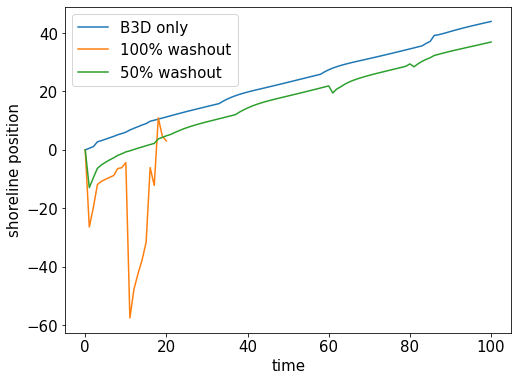

In [12]:
m_xsTS_50 = np.subtract(cascade_outwash50.barrier3d[0].x_s_TS, cascade_outwash50.barrier3d[0].x_s_TS[0])
m_xsTS_50 = np.multiply(m_xsTS_50,10)

# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=max(m_xsTS3), colors='r', linestyles='dotted')
# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=580, colors='r', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")

plt.plot(m_xsTS, label="B3D only")
plt.plot(m_xsTS_100, label="100% washout")
plt.plot(m_xsTS_50, label="50% washout")
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=580, colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
plt.legend()
# plt.savefig(r"D:\NC State\Outwasher\Output\newest_flow_routing\shoreface_nourishment_comparison_substep20.png", facecolor='w')

# washout lost

In [13]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash0 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-left-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.45,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_10yrs_early.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=0,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=3.65E-3,
    cx=0.675
)

In [14]:
for time_step in range(cascade_outwash0._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash0.update()
    if cascade_outwash0.b3d_break:
        break

 Time Step:  0Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step: 

Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Time Step:  357
Outwasher Ti

Outwasher Time Step:  636
Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Time Step:  673
Outwasher Ti

Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Time Step:  990
Outwasher Time Step:  991
Outwasher Ti

Outwasher Time Step:  1260
Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
Outwasher Time Step:  1295
Outwasher Time Step:  1296
O

Outwasher Time Step:  170
Outwasher Time Step:  171
Outwasher Time Step:  172
Outwasher Time Step:  173
Outwasher Time Step:  174
Outwasher Time Step:  175
Outwasher Time Step:  176
Outwasher Time Step:  177
Outwasher Time Step:  178
Outwasher Time Step:  179
Outwasher Time Step:  180
Outwasher Time Step:  181
Outwasher Time Step:  182
Outwasher Time Step:  183
Outwasher Time Step:  184
Outwasher Time Step:  185
Outwasher Time Step:  186
Outwasher Time Step:  187
Outwasher Time Step:  188
Outwasher Time Step:  189
Outwasher Time Step:  190
Outwasher Time Step:  191
Outwasher Time Step:  192
Outwasher Time Step:  193
Outwasher Time Step:  194
Outwasher Time Step:  195
Outwasher Time Step:  196
Outwasher Time Step:  197
Outwasher Time Step:  198
Outwasher Time Step:  199
Outwasher Time Step:  200
Outwasher Time Step:  201
Outwasher Time Step:  202
Outwasher Time Step:  203
Outwasher Time Step:  204
Outwasher Time Step:  205
Outwasher Time Step:  206
Outwasher Time Step:  207
Outwasher Ti

Outwasher Time Step:  487
Outwasher Time Step:  488
Outwasher Time Step:  489
Outwasher Time Step:  490
Outwasher Time Step:  491
Outwasher Time Step:  492
Outwasher Time Step:  493
Outwasher Time Step:  494
Outwasher Time Step:  495
Outwasher Time Step:  496
Outwasher Time Step:  497
Outwasher Time Step:  498
Outwasher Time Step:  499
Outwasher Time Step:  500
Outwasher Time Step:  501
Outwasher Time Step:  502
Outwasher Time Step:  503
Outwasher Time Step:  504
Outwasher Time Step:  505
Outwasher Time Step:  506
Outwasher Time Step:  507
Outwasher Time Step:  508
Outwasher Time Step:  509
Outwasher Time Step:  510
Outwasher Time Step:  511
Outwasher Time Step:  512
Outwasher Time Step:  513
Outwasher Time Step:  514
Outwasher Time Step:  515
Outwasher Time Step:  516
Outwasher Time Step:  517
Outwasher Time Step:  518
Outwasher Time Step:  519
Outwasher Time Step:  520
Outwasher Time Step:  521
Outwasher Time Step:  522
Outwasher Time Step:  523
Outwasher Time Step:  524
Outwasher Ti

Outwasher Time Step:  803
Outwasher Time Step:  804
Outwasher Time Step:  805
Outwasher Time Step:  806
Outwasher Time Step:  807
Outwasher Time Step:  808
Outwasher Time Step:  809
Outwasher Time Step:  810
Outwasher Time Step:  811
Outwasher Time Step:  812
Outwasher Time Step:  813
Outwasher Time Step:  814
Outwasher Time Step:  815
Outwasher Time Step:  816
Outwasher Time Step:  817
Outwasher Time Step:  818
Outwasher Time Step:  819
Outwasher Time Step:  820
Outwasher Time Step:  821
Outwasher Time Step:  822
Outwasher Time Step:  823
Outwasher Time Step:  824
Outwasher Time Step:  825
Outwasher Time Step:  826
Outwasher Time Step:  827
Outwasher Time Step:  828
Outwasher Time Step:  829
Outwasher Time Step:  830
Outwasher Time Step:  831
Outwasher Time Step:  832
Outwasher Time Step:  833
Outwasher Time Step:  834
Outwasher Time Step:  835
Outwasher Time Step:  836
Outwasher Time Step:  837
Outwasher Time Step:  838
Outwasher Time Step:  839
Outwasher Time Step:  840
Outwasher Ti

Outwasher Time Step:  1114
Outwasher Time Step:  1115
Outwasher Time Step:  1116
Outwasher Time Step:  1117
Outwasher Time Step:  1118
Outwasher Time Step:  1119
Outwasher Time Step:  1120
Outwasher Time Step:  1121
Outwasher Time Step:  1122
Outwasher Time Step:  1123
Outwasher Time Step:  1124
Outwasher Time Step:  1125
Outwasher Time Step:  1126
Outwasher Time Step:  1127
Outwasher Time Step:  1128
Outwasher Time Step:  1129
Outwasher Time Step:  1130
Outwasher Time Step:  1131
Outwasher Time Step:  1132
Outwasher Time Step:  1133
Outwasher Time Step:  1134
Outwasher Time Step:  1135
Outwasher Time Step:  1136
Outwasher Time Step:  1137
Outwasher Time Step:  1138
Outwasher Time Step:  1139
Outwasher Time Step:  1140
Outwasher Time Step:  1141
Outwasher Time Step:  1142
Outwasher Time Step:  1143
Outwasher Time Step:  1144
Outwasher Time Step:  1145
Outwasher Time Step:  1146
Outwasher Time Step:  1147
Outwasher Time Step:  1148
Outwasher Time Step:  1149
Outwasher Time Step:  1150
O

Outwasher Time Step:  1419
Outwasher Time Step:  1420
Outwasher Time Step:  1421
Outwasher Time Step:  1422
Outwasher Time Step:  1423
Outwasher Time Step:  1424
Outwasher Time Step:  1425
Outwasher Time Step:  1426
Outwasher Time Step:  1427
Outwasher Time Step:  1428
Outwasher Time Step:  1429
Outwasher Time Step:  1430
Outwasher Time Step:  1431
Outwasher Time Step:  1432
Outwasher Time Step:  1433
Outwasher Time Step:  1434
Outwasher Time Step:  1435
Outwasher Time Step:  1436
Outwasher Time Step:  1437
Outwasher Time Step:  1438
Outwasher Time Step:  1439
Outwasher Time Step:  1440
Outwasher Time Step:  1441
Outwasher Time Step:  1442
Outwasher Time Step:  1443
Outwasher Time Step:  1444
Outwasher Time Step:  1445
Outwasher Time Step:  1446
Outwasher Time Step:  1447
Outwasher Time Step:  1448
Outwasher Time Step:  1449
Outwasher Time Step:  1450
Outwasher Time Step:  1451
 Time Step:  20Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  

Outwasher Time Step:  285
Outwasher Time Step:  286
Outwasher Time Step:  287
Outwasher Time Step:  288
Outwasher Time Step:  289
Outwasher Time Step:  290
Outwasher Time Step:  291
Outwasher Time Step:  292
Outwasher Time Step:  293
Outwasher Time Step:  294
Outwasher Time Step:  295
Outwasher Time Step:  296
Outwasher Time Step:  297
Outwasher Time Step:  298
Outwasher Time Step:  299
Outwasher Time Step:  300
Outwasher Time Step:  301
Outwasher Time Step:  302
Outwasher Time Step:  303
Outwasher Time Step:  304
Outwasher Time Step:  305
Outwasher Time Step:  306
Outwasher Time Step:  307
Outwasher Time Step:  308
Outwasher Time Step:  309
Outwasher Time Step:  310
Outwasher Time Step:  311
Outwasher Time Step:  312
Outwasher Time Step:  313
Outwasher Time Step:  314
Outwasher Time Step:  315
Outwasher Time Step:  316
Outwasher Time Step:  317
Outwasher Time Step:  318
Outwasher Time Step:  319
Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Ti

Outwasher Time Step:  633
Outwasher Time Step:  634
Outwasher Time Step:  635
Outwasher Time Step:  636
Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Ti

 Time Step:  30Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  319
Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Ti

 Time Step:  40Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  417
Outwasher Time Step:  418
Outwasher Time Step:  419
Outwasher Time Step:  420
Outwasher Time Step:  421
Outwasher Time Step:  422
Outwasher Time Step:  423
Outwasher Time Step:  424
Outwasher Time Step:  425
Outwasher Time Step:  426
Outwasher Time Step:  427
Outwasher Time Step:  428
Outwasher Time Step:  429
Outwasher Time Step:  430
Outwasher Time Step:  431
Outwasher Time Step:  432
Outwasher Time Step:  433
Outwasher Time Step:  434
Outwasher Time Step:  435
Outwasher Time Step:  436
Outwasher Time Step:  437
Outwasher Time Step:  438
Outwasher Time Step:  439
Outwasher Time Step:  440
Outwasher Time Step:  441
Outwasher Time Step:  442
Outwasher Time Step:  443
Outwasher Time Step:  444
Outwasher Time Step:  445
Outwasher Time Step:  446
Outwasher Time Step:  447
Outwasher Time Step:  448
Outwasher Time Step:  449
Outwasher Time Step:  450
Outwasher Time Step:  451
Outwasher Time Step:  452
Outwasher Time Step:  453
Outwasher Time Step:  454
Outwasher Ti

Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
Outwasher Time Step:  1295
Outwasher Time Step:  1296
Outwasher Time Step:  1297
Outwasher Time Step:  1298
Outwasher Time Step:  1299
Outwasher Time Step:  1300
Outwasher Time Step:  1301
Outwasher Time Step:  1302
Outwasher Time Step:  1303
Outwasher Time Step:  1304
Outwasher Time Step:  1305
Outwasher Time Step:  1306
Outwasher Time Step:  1307
Outwasher Time Step:  1308
Outwasher Time Step:  1309
Outwasher Time Step:  1310
Outwasher Time Step:  1311
Outwasher Time Step:  1312
Outwasher Time Step:  1313
Outwasher Time Step:  1314
Outwasher Time Step:  1315
Outwasher Time Step:  1316
Outwasher Time Step:  1317
Outwasher Time Step:  1318
Outwasher Time Step:  1319
Outwasher Time Step:  1320
Outwasher Time Step:  1321
Outwasher Time Step:  1322
Outwasher Time Step:  1323
O

Outwasher Time Step:  855
Outwasher Time Step:  856
Outwasher Time Step:  857
Outwasher Time Step:  858
Outwasher Time Step:  859
Outwasher Time Step:  860
Outwasher Time Step:  861
Outwasher Time Step:  862
Outwasher Time Step:  863
Outwasher Time Step:  864
Outwasher Time Step:  865
Outwasher Time Step:  866
Outwasher Time Step:  867
Outwasher Time Step:  868
Outwasher Time Step:  869
Outwasher Time Step:  870
Outwasher Time Step:  871
Outwasher Time Step:  872
Outwasher Time Step:  873
Outwasher Time Step:  874
Outwasher Time Step:  875
Outwasher Time Step:  876
Outwasher Time Step:  877
Outwasher Time Step:  878
Outwasher Time Step:  879
Outwasher Time Step:  880
Outwasher Time Step:  881
Outwasher Time Step:  882
Outwasher Time Step:  883
Outwasher Time Step:  884
Outwasher Time Step:  885
Outwasher Time Step:  886
Outwasher Time Step:  887
Outwasher Time Step:  888
Outwasher Time Step:  889
Outwasher Time Step:  890
Outwasher Time Step:  891
Outwasher Time Step:  892
Outwasher Ti

 Time Step:  60Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  1093
Outwasher Time Step:  1094
Outwasher Time Step:  1095
Outwasher Time Step:  1096
Outwasher Time Step:  1097
Outwasher Time Step:  1098
Outwasher Time Step:  1099
Outwasher Time Step:  1100
Outwasher Time Step:  1101
Outwasher Time Step:  1102
Outwasher Time Step:  1103
Outwasher Time Step:  1104
Outwasher Time Step:  1105
Outwasher Time Step:  1106
Outwasher Time Step:  1107
Outwasher Time Step:  1108
Outwasher Time Step:  1109
Outwasher Time Step:  1110
Outwasher Time Step:  1111
Outwasher Time Step:  1112
Outwasher Time Step:  1113
Outwasher Time Step:  1114
Outwasher Time Step:  1115
Outwasher Time Step:  1116
Outwasher Time Step:  1117
Outwasher Time Step:  1118
Outwasher Time Step:  1119
Outwasher Time Step:  1120
Outwasher Time Step:  1121
Outwasher Time Step:  1122
Outwasher Time Step:  1123
Outwasher Time Step:  1124
Outwasher Time Step:  1125
Outwasher Time Step:  1126
Outwasher Time Step:  1127
Outwasher Time Step:  1128
Outwasher Time Step:  1129
O

 Time Step:  70Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Time Step:  990
Outwasher Time Step:  991
Outwasher Time Step:  992
Outwasher Ti

 Time Step:  80Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  876
Outwasher Time Step:  877
Outwasher Time Step:  878
Outwasher Time Step:  879
Outwasher Time Step:  880
Outwasher Time Step:  881
Outwasher Time Step:  882
Outwasher Time Step:  883
Outwasher Time Step:  884
Outwasher Time Step:  885
Outwasher Time Step:  886
Outwasher Time Step:  887
Outwasher Time Step:  888
Outwasher Time Step:  889
Outwasher Time Step:  890
Outwasher Time Step:  891
Outwasher Time Step:  892
Outwasher Time Step:  893
Outwasher Time Step:  894
Outwasher Time Step:  895
Outwasher Time Step:  896
Outwasher Time Step:  897
Outwasher Time Step:  898
Outwasher Time Step:  899
Outwasher Time Step:  900
Outwasher Time Step:  901
Outwasher Time Step:  902
Outwasher Time Step:  903
Outwasher Time Step:  904
Outwasher Time Step:  905
Outwasher Time Step:  906
Outwasher Time Step:  907
Outwasher Time Step:  908
Outwasher Time Step:  909
Outwasher Time Step:  910
Outwasher Time Step:  911
Outwasher Time Step:  912
Outwasher Time Step:  913
Outwasher Ti

 Time Step:  90Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  1114
Outwasher Time Step:  1115
Outwasher Time Step:  1116
Outwasher Time Step:  1117
Outwasher Time Step:  1118
Outwasher Time Step:  1119
Outwasher Time Step:  1120
Outwasher Time Step:  1121
Outwasher Time Step:  1122
Outwasher Time Step:  1123
Outwasher Time Step:  1124
Outwasher Time Step:  1125
Outwasher Time Step:  1126
Outwasher Time Step:  1127
Outwasher Time Step:  1128
Outwasher Time Step:  1129
Outwasher Time Step:  1130
Outwasher Time Step:  1131
Outwasher Time Step:  1132
Outwasher Time Step:  1133
Outwasher Time Step:  1134
Outwasher Time Step:  1135
Outwasher Time Step:  1136
Outwasher Time Step:  1137
Outwasher Time Step:  1138
Outwasher Time Step:  1139
Outwasher Time Step:  1140
Outwasher Time Step:  1141
Outwasher Time Step:  1142
Outwasher Time Step:  1143
Outwasher Time Step:  1144
Outwasher Time Step:  1145
Outwasher Time Step:  1146
Outwasher Time Step:  1147
Outwasher Time Step:  1148
Outwasher Time Step:  1149
Outwasher Time Step:  1150
O

 Time Step:  99

# plotting results

In [15]:
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams.update({"font.size": 15})
ls="dashed"

## shoreline position

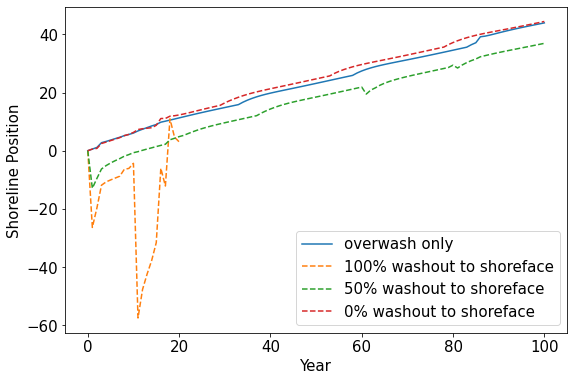

In [16]:
m_xsTS_0 = np.subtract(cascade_outwash0.barrier3d[0].x_s_TS, cascade_outwash0.barrier3d[0].x_s_TS[0])
m_xsTS_0 = np.multiply(m_xsTS_0,10)

plt.xlabel("time")
plt.ylabel("shoreline position")

plt.plot(m_xsTS, label="overwash only")
plt.plot(m_xsTS_100, label="100% washout to shoreface", linestyle=ls)
plt.plot(m_xsTS_50, label="50% washout to shoreface", linestyle=ls)
plt.plot(m_xsTS_0, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Shoreline Position")
plt.legend()


In [17]:
# plt.rcParams['figure.figsize'] = (12,6)

# m_xsTS_0 = np.subtract(cascade_outwash0.barrier3d[0].x_s_TS, cascade_outwash0.barrier3d[0].x_s_TS[0])
# m_xsTS_0 = np.multiply(m_xsTS_0,10)

# plt.xlabel("time")
# plt.ylabel("shoreline position")

# plt.plot(m_xsTS, label="landward-directed flows")
# # plt.plot(m_xsTS_100, label="100% washout to shoreface", linestyle=ls)
# # plt.plot(m_xsTS_50, label="50% washout to shoreface", linestyle=ls)
# plt.plot(m_xsTS_0, label="landward- and seaward-directed flows", linestyle="solid")

# plt.xlabel("Year")
# plt.ylabel("Barrier Migration (m)")
# plt.legend()


## avg interior elevation

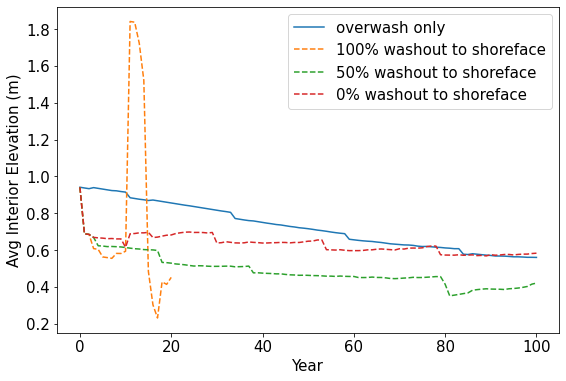

In [18]:
hbTS = np.array(cascade_b3d_only.barrier3d[0].h_b_TS)*10
hbTS2 = np.array(cascade_outwash100.barrier3d[0].h_b_TS)*10
hbTS3 = np.array(cascade_outwash50.barrier3d[0].h_b_TS)*10
hbTS4 = np.array(cascade_outwash0.barrier3d[0].h_b_TS)*10

# plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams.update({"font.size": 15})

plt.plot(hbTS, label="overwash only")
plt.plot(hbTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(hbTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(hbTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Avg Interior Elevation (m)")
plt.legend()
# plt.title("Avg Interior Elevation (m)")

## avg barrier width 

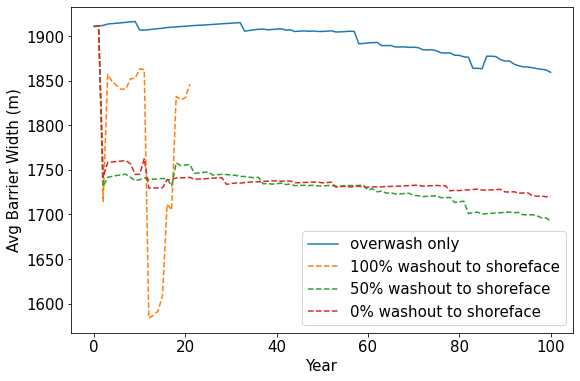

In [19]:
xbTS = np.array(cascade_b3d_only.barrier3d[0].x_b_TS)*10
xbTS2 = np.array(cascade_outwash100.barrier3d[0].x_b_TS)*10
xbTS3 = np.array(cascade_outwash50.barrier3d[0].x_b_TS)*10
xbTS4 = np.array(cascade_outwash0.barrier3d[0].x_b_TS)*10

plt.rcParams.update({"font.size": 15})

plt.plot(xbTS, label="overwash only")
plt.plot(xbTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(xbTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(xbTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Avg Barrier Width (m)")
plt.legend()


## overwash flux

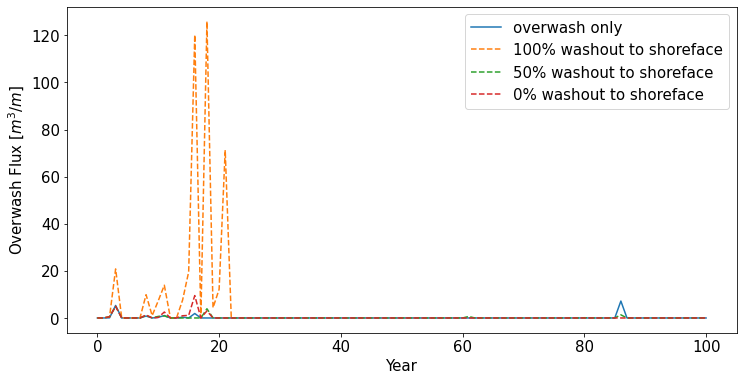

In [20]:
OWTS = cascade_b3d_only.barrier3d[0].QowTS #m3/m
OWTS2 = cascade_outwash100.barrier3d[0].QowTS #m3/m
OWTS3 = cascade_outwash50.barrier3d[0].QowTS #m3/m
OWTS4 = cascade_outwash0.barrier3d[0].QowTS #m3/m

plt.rcParams['figure.figsize'] = (12,6)

plt.plot(OWTS, label="overwash only")
plt.plot(OWTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(OWTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(OWTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Overwash Flux [$m^3/m$]")
plt.legend()
# plt.title("Overwash")

## Outwash Volume

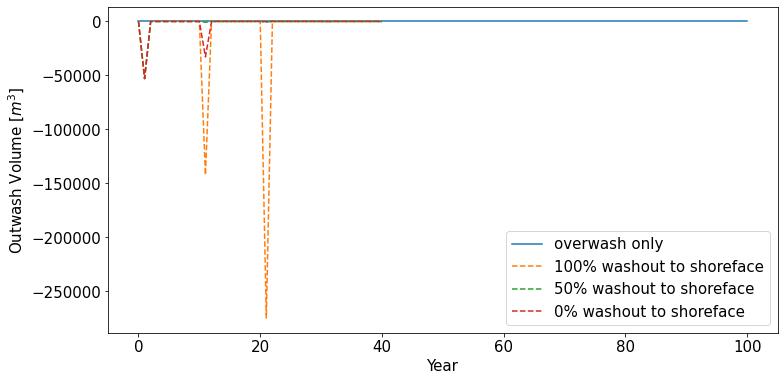

In [21]:
volTS = cascade_b3d_only.outwash[0]._outwash_TS #m3/m
volTS2 = cascade_outwash100.outwash[0]._outwash_TS #m3/m
volTS3 = cascade_outwash50.outwash[0]._outwash_TS #m3/m
volTS4 = cascade_outwash0.outwash[0]._outwash_TS #m3/m

plt.plot(volTS, label="overwash only")
plt.plot(volTS2[0:41], label="100% washout to shoreface", linestyle=ls)
plt.plot(volTS3[0:41], label="50% washout to shoreface", linestyle=ls)
plt.plot(volTS4[0:41], label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Outwash Volume [$m^3$]")
plt.legend(loc="lower right")

# plt.title("Overwash")

## Outwash Flux

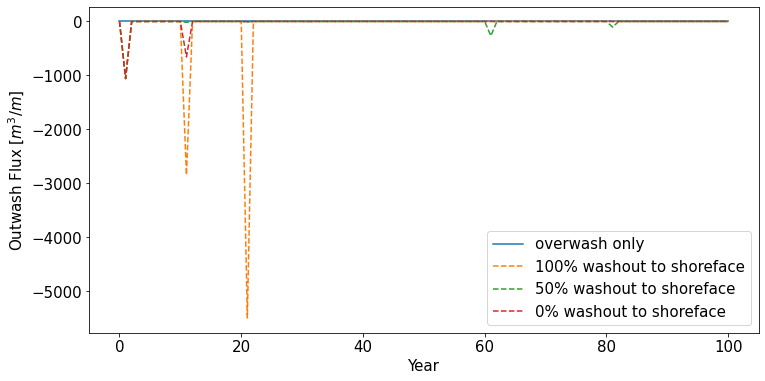

In [22]:
fluxTS = cascade_b3d_only.outwash[0]._outwash_flux_TS #m3/m
fluxTS2 = cascade_outwash100.outwash[0]._outwash_flux_TS #m3/m
fluxTS3 = cascade_outwash50.outwash[0]._outwash_flux_TS #m3/m
fluxTS4 = cascade_outwash0.outwash[0]._outwash_flux_TS #m3/m

plt.plot(fluxTS, label="overwash only")
plt.plot(fluxTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(fluxTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(fluxTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Outwash Flux [$m^3/m$]")
plt.legend(loc="lower right")
# plt.title("Overwash")

## shoreface slope

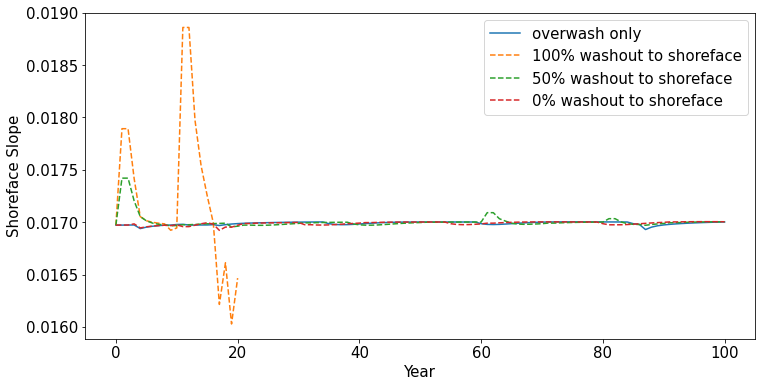

In [23]:
sfTS = cascade_b3d_only.barrier3d[0].s_sf_TS 
sfTS2 = cascade_outwash100.barrier3d[0].s_sf_TS 
sfTS3 = cascade_outwash50.barrier3d[0].s_sf_TS 
sfTS4 = cascade_outwash0.barrier3d[0].s_sf_TS 

# plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams.update({"font.size": 15})

plt.plot(sfTS, label="overwash only")
plt.plot(sfTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(sfTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(sfTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Shoreface Slope")
plt.legend()
# plt.title("Shoreface Slope")

## Dunes

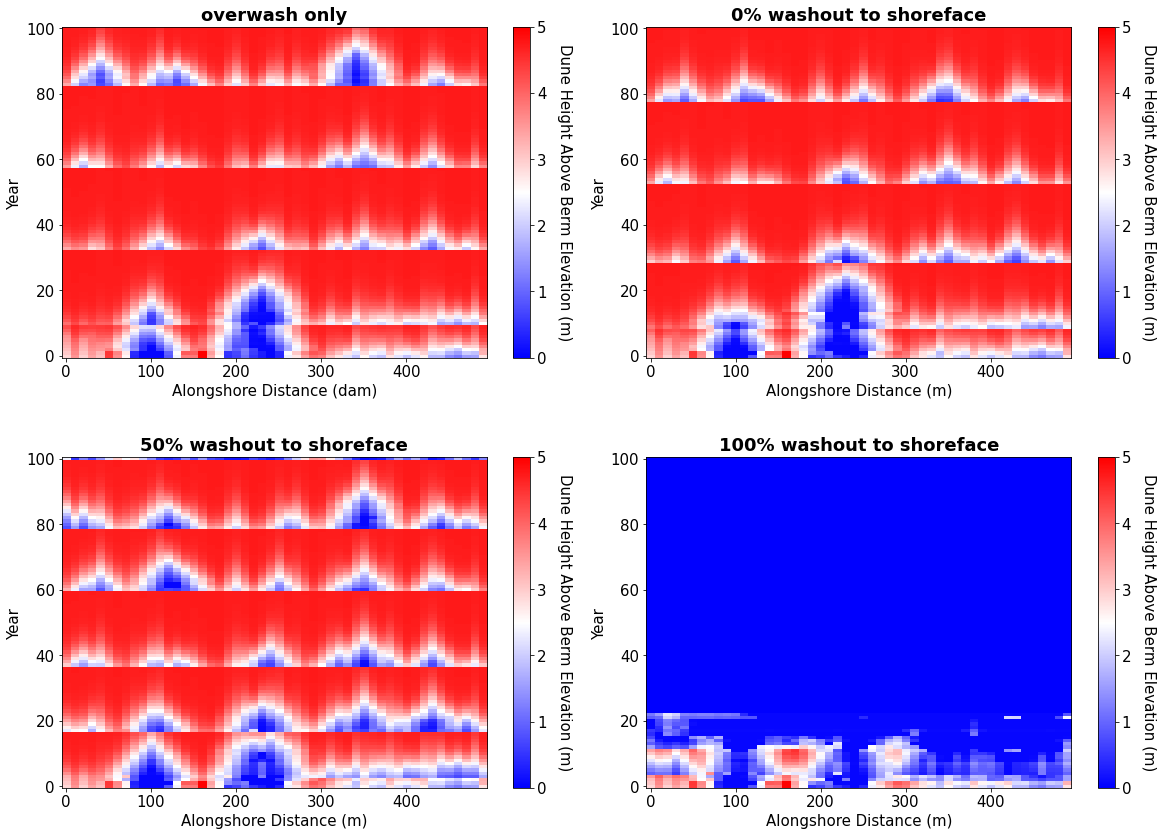

In [35]:
TMAX=101
vmin=0
vmax=5


# Barrier3d only

b3d = cascade_b3d_only.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

duneFig = plt.figure(figsize=(20, 14))
plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(221)
cax = ax.matshow(
    (DuneCrest) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (dam)")
plt.ylabel("Year")
plt.title("overwash only", weight="bold")
# plt.hlines(20, -0.5, 49.5, color="k", linestyles='dashed', linewidth=1)

xtick_max = np.shape(DuneCrest)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)

# cascade 100%

b3d = cascade_outwash100.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(224)
cax = ax.matshow(
    (DuneCrest) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("100% washout to shoreface", weight="bold")
plt.xticks(x_ticks, x_tick_labels)

# cascade 50%

b3d = cascade_outwash50.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(223)
cax = ax.matshow(
    (DuneCrest) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("50% washout to shoreface", weight="bold")
plt.xticks(x_ticks, x_tick_labels)

# cascade 0%

b3d = cascade_outwash0.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(222)
cax = ax.matshow(
    (DuneCrest) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("0% washout to shoreface", weight="bold")
plt.xticks(x_ticks, x_tick_labels)
# plt.hlines(20, -0.5, 49.5, color="k", linestyles='dashed', linewidth=1)


plt.subplots_adjust(hspace=0.3, wspace=0.1)

# elevation plots

In [25]:
# out_plt.plot_ElevAnimation(
#     dunes=cascade_b3d_only.barrier3d[0]._DuneDomain, 
#     interior=cascade_b3d_only.barrier3d[0]._DomainTS, 
#     directory="C:/Users/Lexi/Documents/Research/Thesis/left_seg_max/b3d_only/", 
#     start=0, 
#     stop=cascade_b3d_only.barrier3d[0].TMAX, 
#     freq=1,
#     berm_el=cascade_b3d_only.barrier3d[0].BermEl)

In [26]:
# out_plt.plot_ElevAnimation(
#     dunes=cascade_outwash100.barrier3d[0]._DuneDomain, 
#     interior=cascade_outwash100.barrier3d[0]._DomainTS, 
#     directory="C:/Users/Lexi/Documents/Research/Thesis/left_seg/cascade100/", 
#     start=0, 
#     stop=cascade_outwash100.barrier3d[0].TMAX, 
#     freq=1,
#     berm_el=cascade_outwash100.barrier3d[0].BermEl)

In [27]:
# out_plt.plot_ElevAnimation(
#     dunes=cascade_outwash50.barrier3d[0]._DuneDomain, 
#     interior=cascade_outwash50.barrier3d[0]._DomainTS, 
#     directory="C:/Users/Lexi/Documents/Research/Thesis/left_seg/cascade50/", 
#     start=0, 
#     stop=cascade_outwash50.barrier3d[0].TMAX, 
#     freq=1, 
#     berm_el=cascade_outwash50.barrier3d[0].BermEl)

In [28]:
# out_plt.plot_ElevAnimation(
#     dunes=cascade_outwash0.barrier3d[0]._DuneDomain, 
#     interior=cascade_outwash0.barrier3d[0]._DomainTS, 
#     directory="C:/Users/Lexi/Documents/Research/Thesis/left_seg/cascade0/", 
#     start=0, 
#     stop=cascade_outwash0.barrier3d[0].TMAX, 
#     freq=1, 
#     berm_el=cascade_outwash50.barrier3d[0].BermEl)

In [29]:
# uw = cascade_outwash100.outwash[0]._underwater_array[20][500]
# dh = cascade_outwash100.outwash[0]._downhill_array[20][500]
# end = cascade_outwash100.outwash[0]._endcell_array[20][500]

# plt.rcParams['figure.figsize'] = (10,6)
# plt.rcParams.update({"font.size": 15})

# fig4 = plt.figure()
# ax4 = fig4.add_subplot(111)
# mat4 = ax4.matshow(
#     uw,
#     cmap="binary",
#     vmin=0, vmax=3,
# )
# ax4.set_xlabel('barrier length (m)')
# ax4.set_ylabel('barrier width (m)')
# ax4.set_title("Submerged Array")
# plt.gca().xaxis.tick_bottom()
# xtick_max = np.shape(uw)[1]  # n_cols = x
# x_ticks = np.array(range(0, xtick_max, 10))
# x_tick_labels = x_ticks * 10
# ytick_max = np.shape(uw)[0]  # n_rows = y
# y_ticks = np.array(range(0, ytick_max, 10))
# y_tick_labels = y_ticks * 10
# plt.xticks(x_ticks, x_tick_labels)
# plt.yticks(y_ticks, y_tick_labels)


# fig4 = plt.figure()
# ax4 = fig4.add_subplot(111)
# mat4 = ax4.matshow(
#     dh,
#     cmap="binary",
#     vmin=0, vmax=3,
# )
# ax4.set_xlabel('barrier length (m)')
# ax4.set_ylabel('barrier width (m)')
# # ax4.set_title("Downhill and Underwater Cells")
# plt.gca().xaxis.tick_bottom()
# xtick_max = np.shape(dh)[1]  # n_cols = x
# x_ticks = np.array(range(0, xtick_max, 10))
# x_tick_labels = x_ticks * 10
# ytick_max = np.shape(dh)[0]  # n_rows = y
# y_ticks = np.array(range(0, ytick_max, 10))
# y_tick_labels = y_ticks * 10
# plt.xticks(x_ticks, x_tick_labels)
# plt.yticks(y_ticks, y_tick_labels)
# plt.text(0.5, 3.5, "Light Grey = submerged cells \nDark Grey = downhill cells", fontsize="small")


# fig4 = plt.figure()
# ax4 = fig4.add_subplot(111)
# mat4 = ax4.matshow(
#     end,
#     cmap="binary",
#     vmin=0, vmax=3,
# )
# ax4.set_xlabel('barrier length (m)')
# ax4.set_ylabel('barrier width (m)')
# # ax4.set_title("Endcell Array")
# plt.gca().xaxis.tick_bottom()
# xtick_max = np.shape(end)[1]  # n_cols = x
# x_ticks = np.array(range(0, xtick_max, 10))
# x_tick_labels = x_ticks * 10
# ytick_max = np.shape(end)[0]  # n_rows = y
# y_ticks = np.array(range(0, ytick_max, 10))
# y_tick_labels = y_ticks * 10
# plt.xticks(x_ticks, x_tick_labels)
# plt.yticks(y_ticks, y_tick_labels)
# plt.text(0.5, 5.5, "Light Grey = submerged cells \nDark Grey = downhill cells \nBlack = end cells", fontsize="small")
# # plt.hlines(32.5, -0.5, 49.5, color="k", linestyles='solid', linewidth=1)
# # plt.hlines(34.5, -0.5, 49.5, color="k", linestyles='solid', linewidth=1)

In [30]:
# plt.rcParams['figure.figsize'] = (20,6)
# plt.rcParams.update({"font.size": 15})
# # plt.plot(cascade_outwash100.outwash[0]._final_bay_levels)
# # np.argmax(cascade_outwash100.outwash[0]._final_bay_levels)

# # init_dis2 = cascade_outwash100.outwash[0]._initial_discharge[20][360] 
# # discharge2 = cascade_outwash100.outwash[0]._discharge[20][360]
# # row = np.shape(init_dis)[0]
# # col = np.shape(init_dis)[1]
# # for r in range(row):
# #     for c in range(col):
# #         init_dis2[r,c] = init_dis2[r,c]*1000/3600
# #         discharge2[r,c] = discharge2[r,c]*1000/3600


# fig4 = plt.figure()
# ax4 = fig4.add_subplot(121)
# mat4 = ax4.matshow(
#     init_dis2,
#     cmap="Blues",
#     vmin=0, 
#     vmax=20,
# )
# ax4.set_xlabel('barrier length (m)')
# ax4.set_ylabel('barrier width (m)')
# ax4.set_title("Initial Discharge")
# plt.gca().xaxis.tick_bottom()
# cbar = fig4.colorbar(mat4)
# cbar.set_label('m$^3$/s', rotation=270, labelpad=25)
# xtick_max = np.shape(init_dis)[1]  # n_cols = x
# x_ticks = np.array(range(0, xtick_max, 10))
# x_tick_labels = x_ticks * 10
# ytick_max = np.shape(init_dis)[0]  # n_rows = y
# y_ticks = np.array(range(0, ytick_max, 10))
# y_tick_labels = y_ticks * 10
# plt.xticks(x_ticks, x_tick_labels)
# plt.yticks(y_ticks, y_tick_labels)


# ax4 = fig4.add_subplot(122)
# mat4 = ax4.matshow(
#     discharge2,
#     cmap="Blues",
#     vmin=0, 
#     vmax=200,
# )
# ax4.set_xlabel('barrier length (m)')
# ax4.set_ylabel('barrier width (m)')
# ax4.set_title("Discharge After Flow Routing")
# plt.gca().xaxis.tick_bottom()
# cbar = fig4.colorbar(mat4)
# cbar.set_label('m$^3$/s', rotation=270, labelpad=25)
# xtick_max = np.shape(discharge)[1]  # n_cols = x
# x_ticks = np.array(range(0, xtick_max, 10))
# x_tick_labels = x_ticks * 10
# ytick_max = np.shape(discharge)[0]  # n_rows = y
# y_ticks = np.array(range(0, ytick_max, 10))
# y_tick_labels = y_ticks * 10
# plt.xticks(x_ticks, x_tick_labels)
# plt.yticks(y_ticks, y_tick_labels)

# print(cascade_outwash100.outwash[0]._final_bay_levels[360])
# plt.hlines(32.5, -0.5, 49.5, color="k", linestyles='solid', linewidth=1)
# plt.hlines(34.5, -0.5, 49.5, color="k", linestyles='solid', linewidth=1)

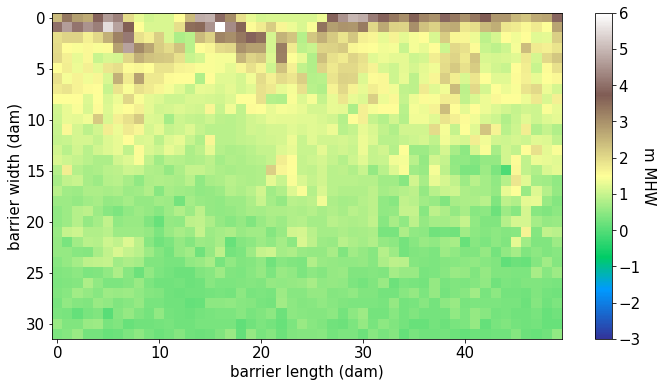

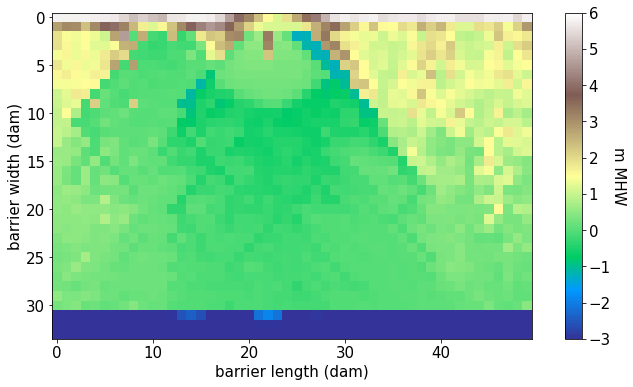

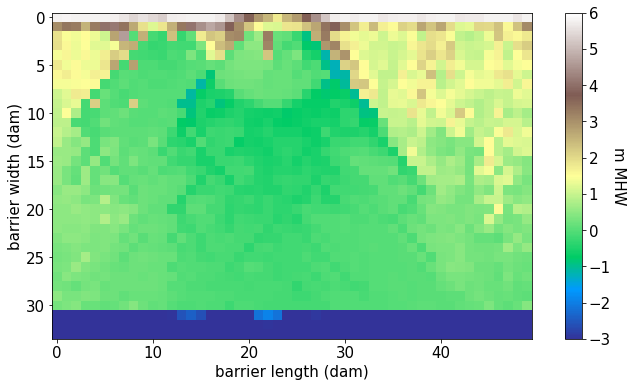

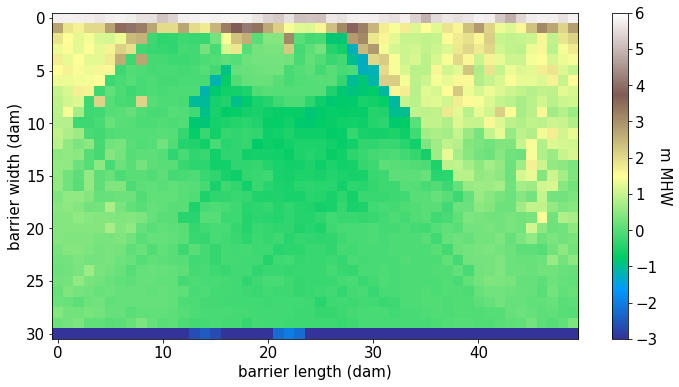

In [31]:
dunes = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[0]) + cascade_outwash0.barrier3d[0].BermEl
interior = cascade_outwash0.barrier3d[0]._DomainTS[0] 
domain = np.vstack([dunes, interior])

min_v = -3
max_v = 6

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    domain*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()


# domain 19 
dunes19 = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[19]) + cascade_outwash0.barrier3d[0].BermEl
interior19 = cascade_outwash0.barrier3d[0]._DomainTS[19] 
domain19 = np.vstack([dunes19, interior19])
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    domain19*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# domain 20 
dunes20 = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[21]) + cascade_outwash0.barrier3d[0].BermEl
interior20 = cascade_outwash0.barrier3d[0]._DomainTS[21] 
domain20 = np.vstack([dunes20, interior20])
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    domain20*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# domain 39 
dunes39 = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[39]) + cascade_outwash0.barrier3d[0].BermEl
interior39 = cascade_outwash0.barrier3d[0]._DomainTS[39] 
domain39 = np.vstack([dunes39, interior39])
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    domain39*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

In [32]:
print(cascade_b3d_only.barrier3d[0]._Dmaxel)

0.584
